## PART 2

### **MACHINE LEARNING MODEL**

In this notebook, we'll utilize the **descriptors_output.csv** file for feature extraction and the pIC50 values from **cd73_bioactivity_data_preprocessed.csv** as our target variable for prediction. By leveraging the lazypredict library, we'll identify the most suitable model for our dataset. Subsequently, we'll apply this model to train our data and generate predictions. At the end:
* we'll obtain the **descriptor_list.csv** with the features that we use 
* we'll save the trained model as **cd73_model.pkl**.

    Install the **lazypredict** package in order to find the best ML model for our regression

In [116]:
# ! pip install lazypredict

Install the libraries

In [117]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

import lazypredict
from lazypredict.Supervised import LazyRegressor

import pickle

Create the features

In [118]:
X= pd.read_csv('PaDEL-Descriptor/descriptors_output.csv')
X= X.drop(columns=['Name'])
X.shape

(338, 881)

Create the target

In [119]:
Y = pd.read_csv('cd73_bioactivity_data_preprocessed.csv')
Y= Y['pIC50']
Y.shape

(338,)

Show the df

In [120]:
df = pd.concat([X,Y], axis=1)
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.38
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.87
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.21
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.39
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.00
334,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.77
335,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.09
336,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.24


In [121]:
# selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
# X = selection.fit_transform(X)

In [122]:
# X.shape

Let's apply a feature thresholding technique to filter out features with low variance or values close to zero. This step helps us focus on the most informative features in our dataset and can improve the performance of our model by reducing noise and dimensionality.

In [123]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=(.8 * (1 - .8))):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X


,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP23,PubchemFP30,PubchemFP31,PubchemFP33,...,PubchemFP737,PubchemFP749,PubchemFP758,PubchemFP770,PubchemFP779,PubchemFP798,PubchemFP800,PubchemFP812,PubchemFP821,PubchemFP833
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,1,...,1,0,1,0,1,1,1,0,1,0
4,0,0,0,1,1,0,0,0,0,1,...,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
334,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
335,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
336,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Export the feature that we use in a csv

In [124]:
X.to_csv('descriptor_list.csv', index = False)

#### We apply the LazyRegressor in order to obtain the best model

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [126]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:26<00:00,  1.57it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 270, number of used features: 262
[LightGBM] [Info] Start training from score 6.850927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

100%|██████████| 42/42 [00:25<00:00,  1.64it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 270, number of used features: 262
[LightGBM] [Info] Start training from score 6.850927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Let's have a look at the prediction of the train (best 15 models)

In [127]:
# Performance table of the training set (80% subset)
predictions_train=predictions_train.sort_values(by=['R-Squared'],ascending=False)[:15]
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,-3.49,0.88,0.65,0.04
ExtraTreeRegressor,-3.49,0.88,0.65,0.02
ExtraTreesRegressor,-3.49,0.88,0.65,1.03
GaussianProcessRegressor,-3.49,0.88,0.65,0.06
XGBRegressor,-3.49,0.88,0.65,0.09
RandomForestRegressor,-4.44,0.86,0.72,0.90
BaggingRegressor,-5.00,0.84,0.75,0.13
MLPRegressor,-5.36,0.83,0.78,0.99
GradientBoostingRegressor,-5.70,0.83,0.80,0.25


Let's have a look at the prediction of the test (best 10 models)

In [128]:
# Performance table of the test set (20% subset) 
predictions_test=predictions_test.sort_values(by=['R-Squared'],ascending=False)[:10]
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,1.11,0.67,1.18,0.11
PoissonRegressor,1.11,0.67,1.18,0.03
LGBMRegressor,1.11,0.67,1.18,0.07
GradientBoostingRegressor,1.12,0.66,1.18,0.27
LassoCV,1.12,0.66,1.19,7.97
BayesianRidge,1.12,0.66,1.19,0.06
ElasticNetCV,1.12,0.66,1.19,8.85
NuSVR,1.12,0.66,1.19,0.02
HistGradientBoostingRegressor,1.12,0.66,1.19,1.12


#### Look at the performance

- **R-Squared (R^2):** R-Squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values of R-Squared indicate a better fit of the model to the data. Therefore, models with higher R-Squared values are preferred.

- **Root Mean Squared Error (RMSE):** RMSE measures the average deviation of the predicted values from the actual values. A lower RMSE indicates better model performance, as it signifies that the model's predictions are closer to the actual values.

- **Time Taken:** We'll also consider the time taken to train the model and generate predictions. While model accuracy is crucial, it's also essential to consider the computational resources required for training and inference.

By examining these performance metrics, we'll gain insights into the effectiveness and efficiency of our machine learning model.



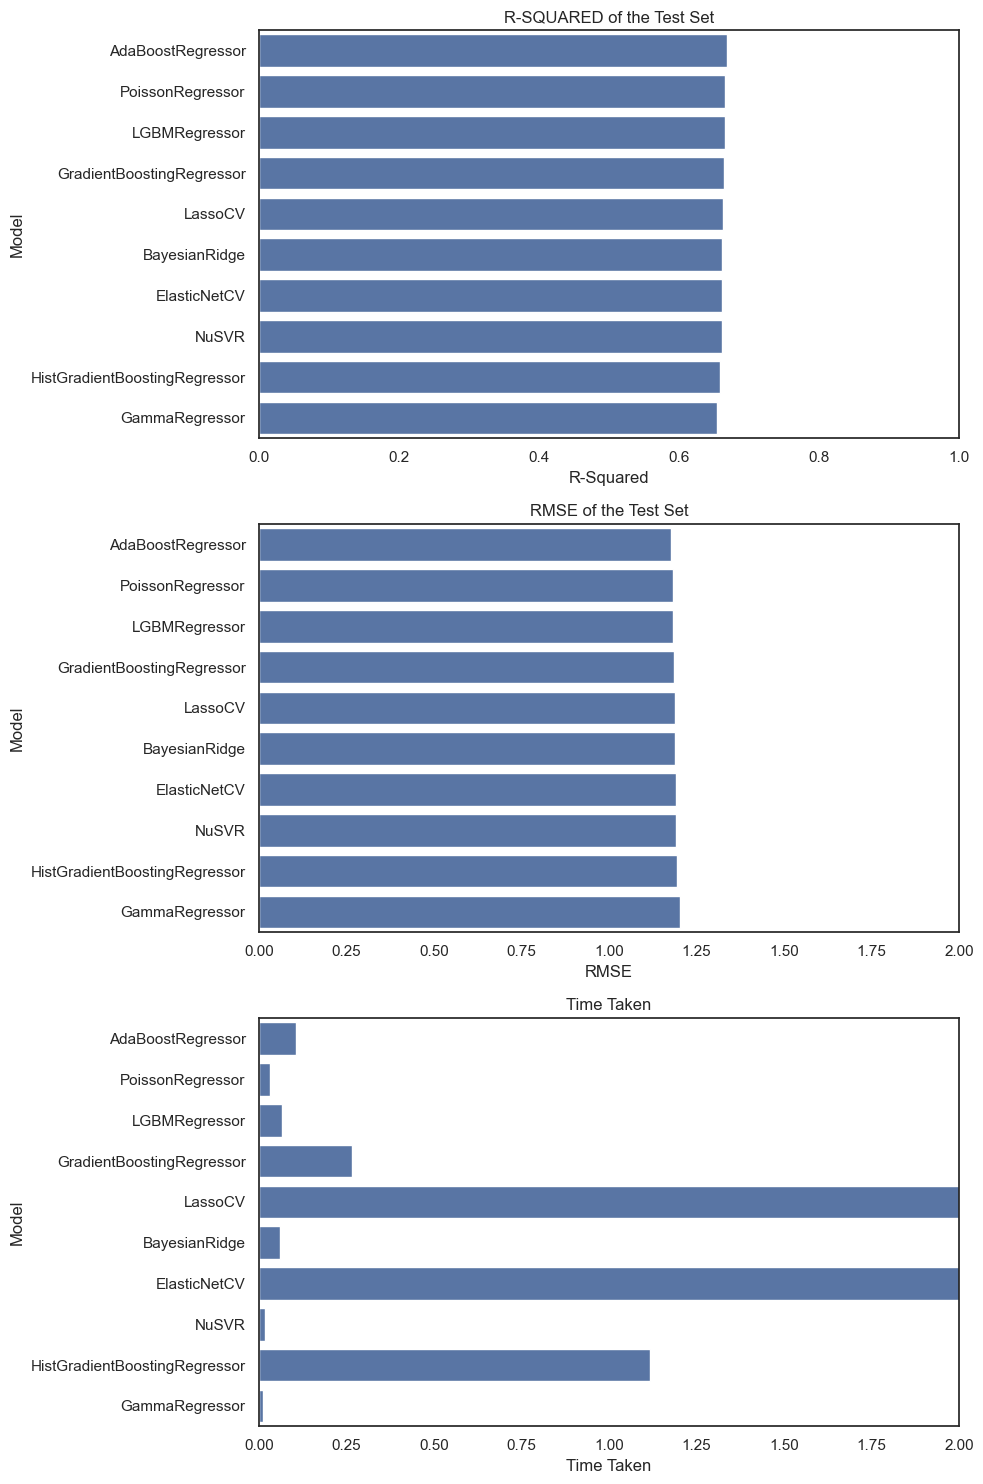

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot R-Squared
sns.barplot(ax=axes[0], y=predictions_test.index, x="R-Squared", data=predictions_test)
axes[0].set(xlim=(0, 1))
axes[0].set_title('R-SQUARED of the Test Set')

# Plot RMSE
sns.barplot(ax=axes[1], y=predictions_test.index, x="RMSE", data=predictions_test)
axes[1].set(xlim=(0, 2))
axes[1].set_title('RMSE of the Test Set')

# Plot Time Taken
sns.barplot(ax=axes[2], y=predictions_test.index, x="Time Taken", data=predictions_test)
axes[2].set(xlim=(0, 2))
axes[2].set_title('Time Taken')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

We use one of the model that performance better: **LGBM regressor**

In [130]:
params = {
    'num_leaves': 31,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_split_gain': 0.001,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'learning_rate': 0.1,
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1
}

In [131]:
import lightgbm as lgb
from sklearn.metrics import r2_score

model = lgb.LGBMRegressor(**params)
model.fit(X_train, Y_train)

LGBMRegressor(metric='rmse', min_split_gain=0.001, objective='regression',
              verbosity=-1)

In [132]:
r2 = model.score(X_test, Y_test)
r2

0.6638239761005289

Based on the total score of 0.66, it indicates a moderate level of performance

In [133]:
Y_pred = model.predict(X_test)

#### Let's examine the regression plot

<function matplotlib.pyplot.show(close=None, block=None)>

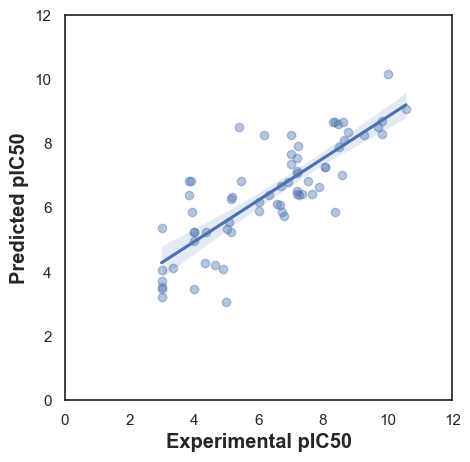

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

#### Save the model as a .pkl file

In [135]:
import pickle
pickle.dump(model, open('cd73_model.pkl', 'wb'))